In [53]:
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np

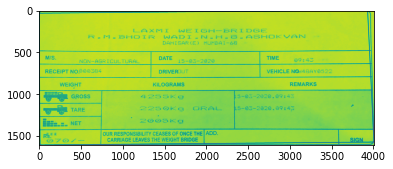

In [54]:
img = cv2.imread("../sample_cropped.jpg", 0)
plt.imshow(img)

In [55]:
img.shape

(1607, 4010)

In [56]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

In [57]:
img_inv = 255-img

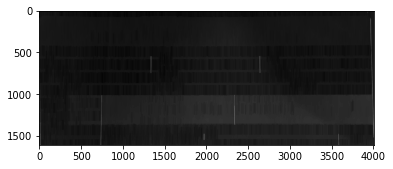

In [58]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_inv, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

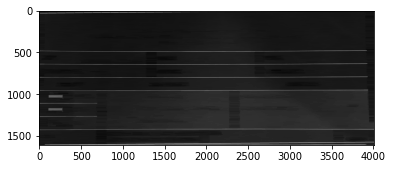

In [59]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_inv, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

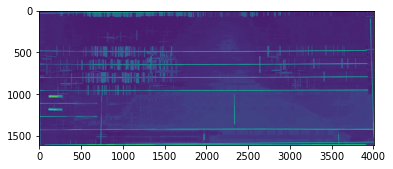

In [60]:
img_vh=image_2|image_1
plt.imshow(img_vh)

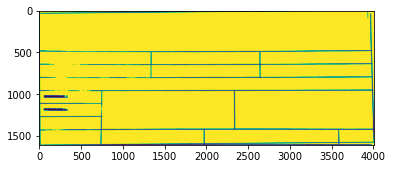

In [61]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(img_vh)

In [62]:
cv2.imwrite('../table.jpg', img_vh)

True

In [63]:
_, labels, stats,_ = cv2.connectedComponentsWithStats(img_vh, connectivity=8, ltype=cv2.CV_32S)

In [64]:
def imshow_components(labels):
    ### creating a hsv image, with a unique hue value for each label
    label_hue = np.uint8(179*labels/np.max(labels))
    ### making saturation and volume to be 255
    empty_channel = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, empty_channel, empty_channel])
    ### converting the hsv image to BGR image
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue==0] = 0
    ### returning the color image for visualising Connected Componenets
    return labeled_img

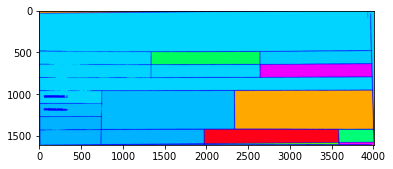

In [65]:
out_image=imshow_components(~labels)
plt.imshow(out_image)